In [1]:
#Quantum Algorithm - Takes advantage of
#Superposition
#Entanglement
#Interference

In [2]:
my_list = [1,3,5,2,4,9,5,8,0,7,6]

In [3]:
#Classical method
def the_oracle(my_input):
    winner = 7
    if my_input is winner:
        response = True
    else:
        response = False
    return response

In [4]:
for index, trial_number in enumerate(my_list):
    if the_oracle(trial_number) is True:
        print('Winner found at index %i' %index)
        print('%i calls to the Oracle used' %(index+1))
        break

Winner found at index 9
10 calls to the Oracle used


In [14]:
#O(N) for classical
#O(sqrt(N)) for Quantum using Grovers
#Grover's Diffusion Operator: [Oracle]+[Reflection]
from qiskit import *
import matplotlib.pyplot as plt
import numpy as np
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor

In [19]:
# define oracle circuit
oracle = QuantumCircuit(2, name='oracle')
oracle.cz(0,1)
oracle.to_gate()
oracle.draw()

q_0: ─■─
      │ 
q_1: ─■─

In [7]:
#Testing if oracle works
# Superposition on each qubit by applying a hadamard gate to each of them
backend = Aer.get_backend('statevector_simulator')
grover_circ = QuantumCircuit(2,2)
grover_circ.h([0,1])
grover_circ.append(oracle, [0,1])
grover_circ.draw()
#applying hadamard to both qubits and them inputing them into the oracle

┌───┐┌─────────┐
q_0: ┤ H ├┤0        ├
     ├───┤│  oracle │
q_1: ┤ H ├┤1        ├
     └───┘└─────────┘
c: 2/════════════════

In [8]:
job = execute(grover_circ, backend)
result = job.result()
sv = result.get_statevector()
np.around(sv, 2)

array([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j])

In [9]:
#Reflection Operator
#with oracle and reflection, we can do amplitude amplification
#we can use this to amplify the winning state and reduce non-winning states
reflection = QuantumCircuit(2,name='reflection')
#circuit that will apply negative to 0,0 state
reflection.h([0,1])
reflection.z([0,1])
reflection.cz(0,1)
reflection.h([0,1])
reflection.to_gate()
reflection.draw()

┌───┐┌───┐   ┌───┐
q_0: ┤ H ├┤ Z ├─■─┤ H ├
     ├───┤├───┤ │ ├───┤
q_1: ┤ H ├┤ Z ├─■─┤ H ├
     └───┘└───┘   └───┘

In [23]:
#Putting it all together
backend = Aer.get_backend('qasm_simulator')
grover_circ = QuantumCircuit(2,2)
#prepare superpostion state
grover_circ.h([0,1])
#adding the oracle
grover_circ.append(oracle, [0,1])
#adding reflection operator
grover_circ.append(reflection, [0,1])
grover_circ.measure([0,1],[0,1])
grover_circ.draw()

┌───┐┌─────────┐┌─────────────┐┌─┐   
q_0: ┤ H ├┤0        ├┤0            ├┤M├───
     ├───┤│  oracle ││  reflection │└╥┘┌─┐
q_1: ┤ H ├┤1        ├┤1            ├─╫─┤M├
     └───┘└─────────┘└─────────────┘ ║ └╥┘
c: 2/════════════════════════════════╩══╩═
                                     0  1

In [24]:
job = execute(grover_circ, backend, shots = 1000)
result = job.result()
result.get_counts()

{'11': 1000}

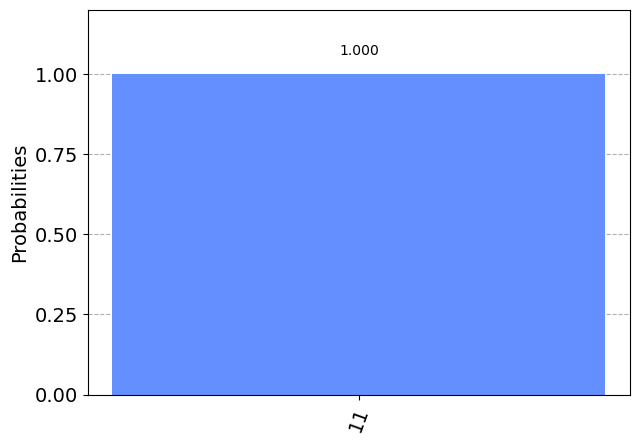

In [25]:
plot_histogram(result.get_counts())

In [15]:
#Terra Real Hardware Execution
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
device = provider.get_backend('ibm_oslo')

ibmqfactory.load_account:WARNING:2022-12-15 12:15:22,859: Credentials are already in use. The existing account in the session will be replaced.


In [16]:
job = execute(grover_circ, backend=device, shots=1024)
print(job.job_id())
job_monitor(job)

639b805e9316bb608e2a16b1
Job Status: job has successfully run


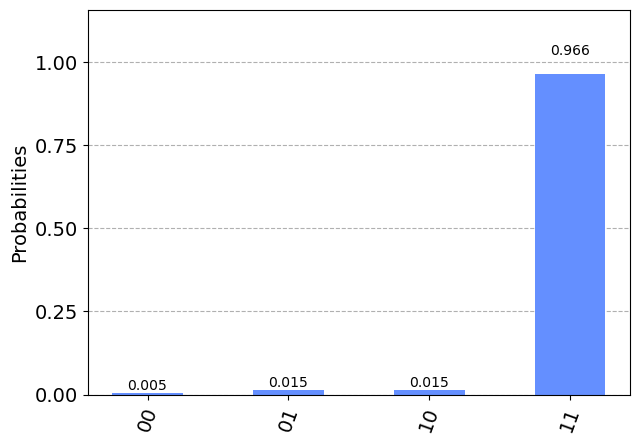

In [17]:
device_result = job.result()
plot_histogram(device_result.get_counts())